In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [34]:
dt=pd.read_csv('C:\\Users\\Acer\\Downloads\\realfile\\Mall_Customers.csv')

In [35]:
dt.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
# finding no of row and cols
dt.shape

(200, 5)

In [37]:
# getting customer info
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [38]:
#checking for null values
dt.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [39]:
# assembling the priority cols --> Annual Income (k$) and Spending Score (1-100) in new variable X
X = dt.iloc[:,[3,4]].values #iloc[rows, col]

In [40]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [41]:
# finding number of clusters
# within clusters sum of squares
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters =i, init='k-means++', random_state=42)
    # fiting X data into kn=means clustering
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

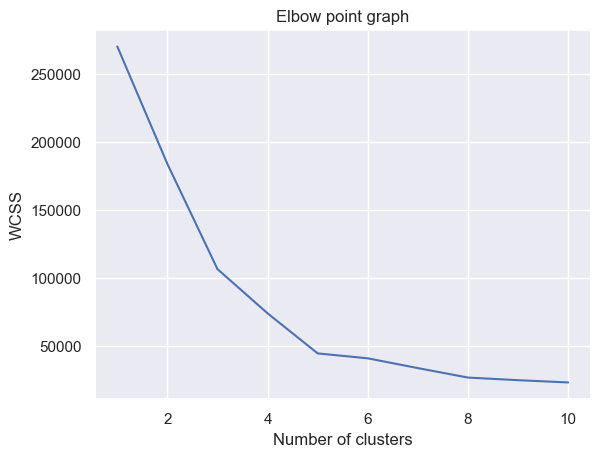

In [42]:
# plot an elbow graph to find the minimum value 
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Elbow point graph")
plt.xlabel('Number of clusters')
plt.ylabel("WCSS")
plt.show()


In [43]:
#The optimum number of clusters are: 5

In [44]:
# Training the k-Means Clustering Model
# dividing the resultant n value into 5 types of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y= kmeans.fit_predict(X)
print(Y)


[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [45]:
# got 5 clusters --> 0, 1, 2, 3, 4 by using euclidian distance formula of kMeans Clustering.

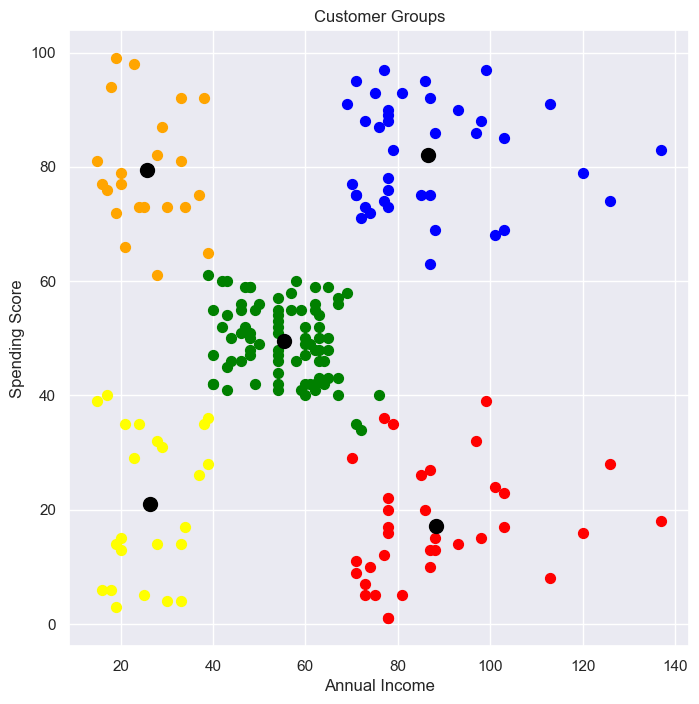

In [51]:
# visualizing all the clusters
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1] ,s=50, c='green', label='Cluster1')
plt.scatter(X[Y==1,0], X[Y==1,1] ,s=50, c='blue', label='Cluster2')
plt.scatter(X[Y==2,0], X[Y==2,1] ,s=50, c='red', label='Cluster3')
plt.scatter(X[Y==3,0], X[Y==3,1] ,s=50, c='yellow', label='Cluster4')
plt.scatter(X[Y==4,0], X[Y==4,1] ,s=50, c='orange', label='Cluster5')


# plotting centroids
kmeans.fit(X)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroid')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()